In [31]:
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [32]:
url1 = '/Users/mac/Downloads/admission4.csv'
perf1 = pd.read_csv(url1)

In [38]:
#np.shape(perf1)
perf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  998 non-null    int64 
 1   userID      998 non-null    object
 2   age         998 non-null    int64 
 3   sex         998 non-null    object
 4   edu         998 non-null    object
 5   major       998 non-null    bool  
 6   work        998 non-null    bool  
 7   IAT         998 non-null    int64 
 8   self        998 non-null    int64 
 9   HPC         998 non-null    int64 
 10  perf        998 non-null    int64 
 11  impr        998 non-null    int64 
dtypes: bool(2), int64(7), object(3)
memory usage: 80.0+ KB


In [34]:
transform = MinMaxScaler()
y = np.array(perf1['impr'])
data = np.array(perf1)
#perf1

In [35]:
ohe = pd.get_dummies(perf1[['sex','edu']])
#ohe

In [40]:
x= np.c_[data[:,2],data[:,5:10],np.array(ohe)]
x[1]

array([30, False, True, 31, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=object)

In [41]:

x = transform.fit_transform(x)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

In [49]:
network = models.Sequential()
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64,activation='relu'))
network.add(layers.Dense(1))

network.compile(optimizer='rmsprop',
 loss='mean_squared_error',metrics='accuracy')

network.fit(x_train,y_train,epochs=1000,batch_size= 128)

Epoch 1/1000
7/7 [==============================] - 1s 2ms/step - loss: 32.0727 - accuracy: 0.0702
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 31.4428 - accuracy: 0.0689
Epoch 3/1000
7/7 [==============================] - 0s 3ms/step - loss: 30.8439 - accuracy: 0.0702
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 30.3630 - accuracy: 0.0652
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 29.8918 - accuracy: 0.0664
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 29.4723 - accuracy: 0.0664
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 29.0771 - accuracy: 0.0677
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 28.7378 - accuracy: 0.0652
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 28.5155 - accuracy: 0.0664
Epoch 10/1000
7/7 [==============================] - 0s 2ms/step - loss: 28.2390 - accuracy: 0.0677
Epoch 11/

In [45]:

def compare_graph(network,x_test,y_test):
    y_pred = network.predict(x_test).flatten()
    real =[]
    pred = []
    index = []
    for i in range(100):
        index.append(i)
        real.append(y_test[i])
        pred.append(y_pred[i])
    plt.figure(figsize=(10,5))
    plt.plot(index,real,'b-',label = 'Real Improvement')
    plt.plot(index,pred,'r--',label = 'Pred Improvement')
    plt.legend(loc='upper right', fontsize =12 )
    plt.show()

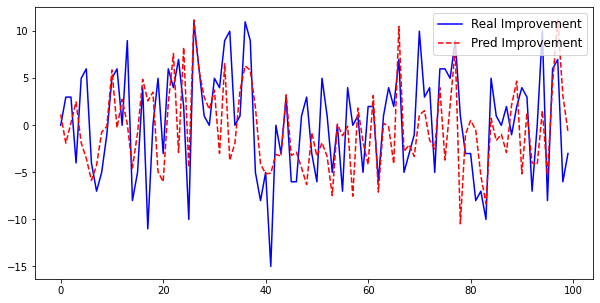

In [46]:
compare_graph(network,x_test,y_test)

In [47]:
test_loss, test_acc = network.evaluate(x_train,y_train)
print('accuaracy:',test_acc)
print('loss:', test_loss)

25/25 [==============================] - 0s 1ms/step - loss: 11.2425 - accuracy: 0.0739
accuaracy: 0.07393483817577362
loss: 11.24252986907959
